# <span style="color:#756bb1">Data Mining Project: Regression Task on dataset Meta</span>

The project is divided into several phases:

1. **Dataset Analysis**: Involves loading the dataset using scikit-learn's `fetch_openml` function and organizing the data into a pandas DataFrame. The first few rows should be displayed for an overview.

2. **Preprocessing**: This step includes removing nominal features and handling missing values either by deletion or interpolation using pandas' `interpolate` method. Two datasets, D1 (with missing values removed) and D2 (with interpolated values), are created for further processing, including normalization or standardization.

3. **Regression**: Involves splitting both datasets into training and test sets and applying various regression models (like Linear Regression, Logistic Regression, Support Vector, Decision Trees, Random Forest, Gradient Boosting) with default parameters. The results should be reported in terms of MAE, MAPE, and SMAPE, with appropriate graphs plotted for both datasets.

## <span style="color:#e6550d">0. General Info</span>

Author:
- Marco Sau

Serial Number:
- 60/79/00028

Purpose:
- Data mining project focusing on a regression task using the Meta dataset.

Dataset source:
- [Dataset Link](https://openml.org/search?type=data&id=566&sort=runs&status=active)

Cloud resources:
- [GitHub Repo](https://github.com/Marco-Sau/Meta-Dataset-Regression)

Date:
- February 2024

## <span style="color:#e6550d">1. Dataset Analysis</span>

### <span style="color:#31a354">Libraries</span>

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotting_functions import * # Custom plotting functions

from math import sqrt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### <span style="color:#31a354">Extra results</span>
In this section, we have the option to obtain additional results that are not mandatory for the task.

In [155]:
# Extra metrics compute the mean absolute error and the root mean squared error
extra_metrics = False

# Extra plots to show the distribution of the data of the dataset D1, D2, D1 standardized, and D2 standardized
extra_plots = False

# Normalize test shows the results of the models with the test set normalized
normalize_test = False

# Set seed for reproducibility
np.random.seed(42)

### <span style="color:#31a354">Functions</span>
In this section there are the functions used to answer the research questions.

The SMAPE function is used in the course.

![smape function.png](<attachment:smape function.png>)
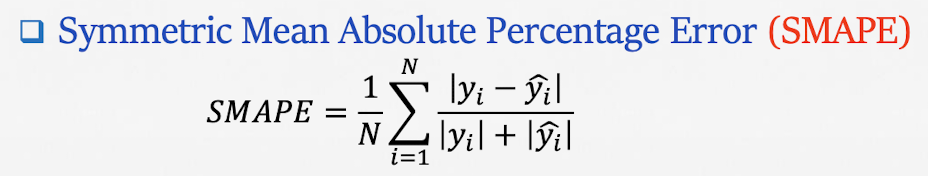

In [156]:
def smape(y_true, y_pred):
    """
    Calculate the Symmetric Mean Absolute Percentage Error (SMAPE)

    :param y_true: Array of real values
    :param y_pred: Array of predicted values
    :return: SMAPE score
    """
    
    # Convert inputs to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate the SMAPE
    numerator = np.abs(np.subtract(y_true, y_pred))
    denominator = (np.abs(y_true) + np.abs(y_pred))
    
    # To avoid division by zero, we'll replace 0 denominators with a small number
    denominator[denominator == 0] = np.finfo(float).eps
    
    smape_value = (1 / len(y_true)) * np.sum(numerator / denominator)
    
    return smape_value

Function to train and evaluate the models.

In [157]:
def train_and_evaluate(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple regression models on given datasets.

    This function iterates over a predefined set of regression models, 
    trains each on the provided training dataset, and then evaluates them on the testing dataset. 
    It calculates the Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), 
    and Symmetric Mean Absolute Percentage Error (SMAPE) for each model.
    
    Additionally, if the `extra_metrics` flag is set to True, it also calculates the
    Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for each model.

    Parameters:
    X_train (DataFrame or array-like): Training feature dataset.
    X_test (DataFrame or array-like): Testing feature dataset.
    y_train (Series or array-like): Training target variable.
    y_test (Series or array-like): Testing target variable.

    Returns:
    dict: A dictionary containing the evaluation metrics for each model. 
    Each entry corresponds to a model and contains another dictionary with 
    the keys 'MAE', 'MAPE', and 'SMAPE' mapping to their respective values.
    Additionally, if `extra_metrics` is True, the inner dictionary will also contain
    'MSE' and 'RMSE' keys.
    """
    

    models = {
        "Linear Regression": LinearRegression(),
        "Support Vector": SVR(),
        "Decision Trees": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor()
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = round(mean_absolute_error(y_test, y_pred), 5)
        mape = round(mean_absolute_percentage_error(y_test, y_pred), 5)
        smape_value = round(smape(y_test, y_pred), 5)
        
        if extra_metrics:
            mse = round(mean_squared_error(y_test, y_pred, squared=True), 5)
            rmse = round(mean_squared_error(y_test, y_pred, squared=False), 5)
            
            results[name] = {"MAE": mae,"MAPE": mape, "SMAPE": smape_value, "MSE": mse, "RMSE": rmse}
        else:
            results[name] = {"MAE": mae,"MAPE": mape, "SMAPE": smape_value}
    
    return results

Function to standardize the datasets.

In [158]:
def standardize_datasets(*datasets):
    """
    Standardizes the given datasets using StandardScaler.

    :param datasets: Tuple of datasets (numpy arrays)
    :return: Tuple of standardized datasets
    """
    scalers = []
    standardized_data = []

    for data in datasets:
        scaler = StandardScaler()
        standardized_data.append(scaler.fit_transform(data))
        scalers.append(scaler)  # Save the scaler if you need to inverse transform later

    return tuple(standardized_data)

Function to normalize the datasets.

In [159]:
def normalize_datasets(D1, D2):
    """
    Normalize two datasets using Min-Max scaling.

    This function takes two datasets and normalizes them using Min-Max scaling. 
    The scaling is fitted on D1 and then applied to both D1 and D2 to ensure consistency in scaling for both datasets. 
    The function reshapes the data if it's in the Series format, performs the normalization, and then returns the 
    data in its original format (DataFrame or Series) with the same indices and column names.

    Parameters:
    D1 : The first dataset to be normalized.
    D2 : The second dataset to be normalized.

    Returns:
    tuple: A tuple containing two elements, where the first element is the normalized version of D1 and the second 
           element is the normalized version of D2. The format (DataFrame or Series) of the outputs matches that of 
           the corresponding inputs.

    Notes:
    - The normalization is performed so that the values in each dataset range between 0 and 1.
    """
    
    scaler = MinMaxScaler()

    # Reshape if D1 and D2 are Series. If they are DataFrames, this step can be skipped.
    if isinstance(D1, pd.Series):
        D1 = D1.values.reshape(-1, 1)
    if isinstance(D2, pd.Series):
        D2 = D2.values.reshape(-1, 1)

    # Normalize D1 and D2
    D1_normalized = scaler.fit_transform(D1)
    D2_normalized = scaler.transform(D2)

    # Convert back as per original input
    if isinstance(D1, pd.DataFrame):
        D1_normalized = pd.DataFrame(D1_normalized, columns=D1.columns, index=D1.index)
    else:
        D1_normalized = pd.Series(D1_normalized.flatten(), index=D1.index)

    if isinstance(D2, pd.DataFrame):
        D2_normalized = pd.DataFrame(D2_normalized, columns=D2.columns, index=D2.index)
    else:
        D2_normalized = pd.Series(D2_normalized.flatten(), index=D2.index)

    return D1_normalized, D2_normalized

### <span style="color:#31a354">The Meta Dataset</span>

- data: Array containing the data; 
- target: Array containing the dataset labels; 
- feature_names: The Names of Each Feature.

In [160]:
# Fetch the dataset using sklearn's fetch_openml
dataset = fetch_openml(name='meta', version=1)

# Convert to pandas DataFrame
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

# Extract the target variable
df['target'] = dataset.target

Description of the dataset.

In [161]:
# Description of the dataset
print(dataset.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

1. Title: meta-data

2. Sources:
(a) Creator:
LIACC - University of Porto
R.Campo Alegre 823
4150 PORTO
(b) Donor: P.B.Brazdil or J.Gama            Tel.:  +351 600 1672
LIACC, University of Porto               Fax.:  +351 600 3654
Rua Campo Alegre 823                     Email:  statlog-adm@ncc.up.pt
4150 Porto, Portugal
(c) Date: March, 1996

(d) Acknowlegements:
LIACC wishes to thank Commission of European Communities
for their support. Also, we wish to thank the following partners
for providing the individual test results:

- Dept. of Statistics, University of Strathclyde, Glasgow, UK
- Dept. of Statistics, University of Leeds, UK
- Aston University, Birmingham, UK
- Forschungszentrum Ulm, Daimler-Benz AG, Germany
- Brainware GmbH, Berlin, Germany
- Frauenhofer Gesellschaft IITB-EPO, Berlin, Germany
- Institut fuer Kybernetik, Bochum, Germany
- ISoft, Gif sur Yvette, France
- Dept. of CS and AI, University of G

Size of the dataset.</br>
The dataset contains 528 rows and 22 columns.

In [162]:
# Shape of the dataset
df.shape

(528, 22)

Attribute Information.</br>
In this table there are the info about data, in terms of attribute name, type, and description.</br>
The dataset contains 20 continuous variables and 2 categorical variables.

| No. | Attribute   | Type         | Description                                |
|-----|-------------|--------------|--------------------------------------------|
| 1   | DS_Name     | categorical  | Name of DataSet                            |
| 2   | T           | continuous   | Number of examples in test set             |
| 3   | N           | continuous   | Number of examples                         |
| 4   | p           | continuous   | Number of attributes                       |
| 5   | k           | continuous   | Number of classes                          |
| 6   | Bin         | continuous   | Number of binary Attributes                |
| 7   | Cost        | continuous   | Cost (1=yes,0=no)                          |
| 8   | SDratio     | continuous   | Standard deviation ratio                   |
| 9   | correl      | continuous   | Mean correlation between attributes        |
| 10  | cancor1     | continuous   | First canonical correlation                |
| 11  | cancor2     | continuous   | Second canonical correlation               |
| 12  | fract1      | continuous   | First eigenvalue                           |
| 13  | fract2      | continuous   | Second eigenvalue                          |
| 14  | skewness    | continuous   | Mean of \|E(X-Mean)\|^3/STD^3              |
| 15  | kurtosis    | continuous   | Mean of \|E(X-Mean)\|^4/STD^4              |
| 16  | Hc          | continuous   | Mean entropy of attributes                 |
| 17  | Hx          | continuous   | Entropy of classes                         |
| 18  | MCx         | continuous   | Mean mutual entropy of class and attributes|
| 19  | EnAtr       | continuous   | Equivalent number of attributes            |
| 20  | NSRatio     | continuous   | Noise-signal ratio                         |
| 21  | Alg_Name    | categorical  | Name of Algorithm                          |
| 22  | Norm_error  | continuous   | Normalized Error (continuous class)        |


Overview of the target values.

In [163]:
# Target variable 
print(dataset.target, "\n")

# Min and max values of the target variable
min_target = df['target'].min()
max_target = df['target'].max()
print(f"Min: {min_target}, Max: {max_target}")

0       3.893
1       5.450
2       1.791
3       1.557
4       3.114
        ...  
523     3.421
524    12.056
525     0.000
526    12.789
527     5.458
Name: class, Length: 528, dtype: float64 

Min: 0.0, Max: 12041.0


Looking at the results, there is a huge difference between the min and max value. Later in the notebook we are going to plot the distribution of these values to get a deeper understanding of the target.

In the next section we investigate more deeply in the target variable regarding the number of unique values.<br>

**Observations**:
- The results shows that there are 55 duplicate target values, the total number of instances that have the same output of another are 436, and only 92 instances has a unique value. This result could be relevant in understanding the performance if it will be confirmed in the modified datasets.

In [164]:
# Count how many times a target values exist more then 1 time 
total_instances = df.shape[0]
unique_counts = df['target'].value_counts()
filtered_counts = unique_counts[unique_counts > 1]

# To display the results
print(f"Number of target values repeated more then 1 time:\n{len(filtered_counts)}")
print(f"Number of instances that have the same target value than another:\n{len(unique_counts)}")
print(f"Number of instances with a unique target value:\n{total_instances - len(unique_counts)}")
print(f"Target value and number of repetitions:\n{filtered_counts} ")


Number of target values repeated more then 1 time:
55
Number of instances that have the same target value than another:
436
Number of instances with a unique target value:
92
Target value and number of repetitions:
0.000        24
161.514       6
9.523         5
12.819        4
8.582         3
2.711         3
9.939         3
467.007       3
3.893         3
0.779         3
460.999       2
5.249         2
7.636         2
12041.000     2
52.292        2
0.954         2
270.416       2
2.286         2
4.364         2
9.068         2
6.027         2
37.270        2
51.781        2
10.391        2
2.513         2
2.408         2
9.714         2
3.196         2
2.596         2
4.394         2
10.574        2
6.743         2
0.282         2
3.126         2
2.817         2
166.556       2
6.142         2
9.379         2
10.247        2
3.629         2
0.279         2
108.421       2
664.078       2
2.130         2
5.138         2
67.655        2
20.781        2
9.035         2
27.105        2
1

Extract the first rows of the dataset to have an overview of the data.

In [166]:
# Print the first few rows of the DataFrame
print(df.head())

       DS_Name      T      N     p    k  Bin  Cost  SDratio  correl  cancor1  \
0  Aust_Credit  690.0  690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713   
1  Aust_Credit  690.0  690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713   
2  Aust_Credit  690.0  690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713   
3  Aust_Credit  690.0  690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713   
4  Aust_Credit  690.0  690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713   

   ...  fract2  skewness  kurtosis      Hc      Hx    MCx    EnAtr  NSRatio  \
0  ...     NaN    1.9701   12.5538  0.9912  2.3012  0.113  8.77168  19.3646   
1  ...     NaN    1.9701   12.5538  0.9912  2.3012  0.113  8.77168  19.3646   
2  ...     NaN    1.9701   12.5538  0.9912  2.3012  0.113  8.77168  19.3646   
3  ...     NaN    1.9701   12.5538  0.9912  2.3012  0.113  8.77168  19.3646   
4  ...     NaN    1.9701   12.5538  0.9912  2.3012  0.113  8.77168  19.3646   

    Alg_Name  target  
0        Ac2   3.893 

Description of the dataset.</br>
In this section the main statistical information are shown for each variable.</br>
These data give a first view of the data in terms of mean, standard deviation, min and max values, quartiles.

In [167]:
# Complete description of the dataset
print(df.describe())

                  T             N           p           k         Bin  \
count    528.000000    528.000000  528.000000  528.000000  528.000000   
mean    4569.045455  10734.181818   29.545455    9.727273    3.181818   
std     5578.155240  14247.300659   36.040113   18.929647    9.087237   
min      270.000000    270.000000    6.000000    2.000000    0.000000   
25%      900.000000    900.000000   13.000000    2.000000    0.000000   
50%     1749.500000   4092.500000   16.000000    3.000000    0.000000   
75%     7480.000000  18000.000000   36.000000    7.000000    1.000000   
max    20000.000000  58000.000000  180.000000   91.000000   43.000000   

             Cost     SDratio      correl     cancor1     cancor2      fract1  \
count  528.000000  528.000000  504.000000  528.000000  288.000000  528.000000   
mean     0.136364    1.479105    0.236838    0.794836    0.741058    0.700673   
std      0.343500    0.643741    0.181793    0.152942    0.257999    0.337779   
min      0.000000 

Finding missing values.</br>
From a deep analysis of the data it came out there are 3 variables with missing data. More specifically the variables are:
- correl
- cancor2
- fract2

This variables will be investigated in deep within the generation of the dataset D1.

In [168]:
# Check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DS_Name   528 non-null    category
 1   T         528 non-null    float64 
 2   N         528 non-null    float64 
 3   p         528 non-null    float64 
 4   k         528 non-null    float64 
 5   Bin       528 non-null    float64 
 6   Cost      528 non-null    float64 
 7   SDratio   528 non-null    float64 
 8   correl    504 non-null    float64 
 9   cancor1   528 non-null    float64 
 10  cancor2   288 non-null    float64 
 11  fract1    528 non-null    float64 
 12  fract2    288 non-null    float64 
 13  skewness  528 non-null    float64 
 14  kurtosis  528 non-null    float64 
 15  Hc        528 non-null    float64 
 16  Hx        528 non-null    float64 
 17  MCx       528 non-null    float64 
 18  EnAtr     528 non-null    float64 
 19  NSRatio   528 non-null    float64 
 20  Alg_Name  

To get an even clear idea of the dataset we plot the distribution of the values for each variable.</br>
From a preliminary analysis we can make some conclusions:

1. **Variability**: There's considerable variability in the data, as indicated by the range and standard deviation values.

2. **Skewness**: Many variables exhibit significant skewness. This could mean a concentration of lower values with some exceptionally high values in these variables.

3. **Kurtosis**: High kurtosis values suggest that the data has heavy tails or outliers. This implies a higher probability of extreme values compared to a normal distribution.

4. **Outliers and Data Quality**: The presence of high skewness and kurtosis in several variables suggests potential outliers.

5. **Target Variable**: The target variable has a great concentration of values close to zero, with extreme value on the other side.

Overall, your dataset shows significant variability and suggests the presence of outliers.

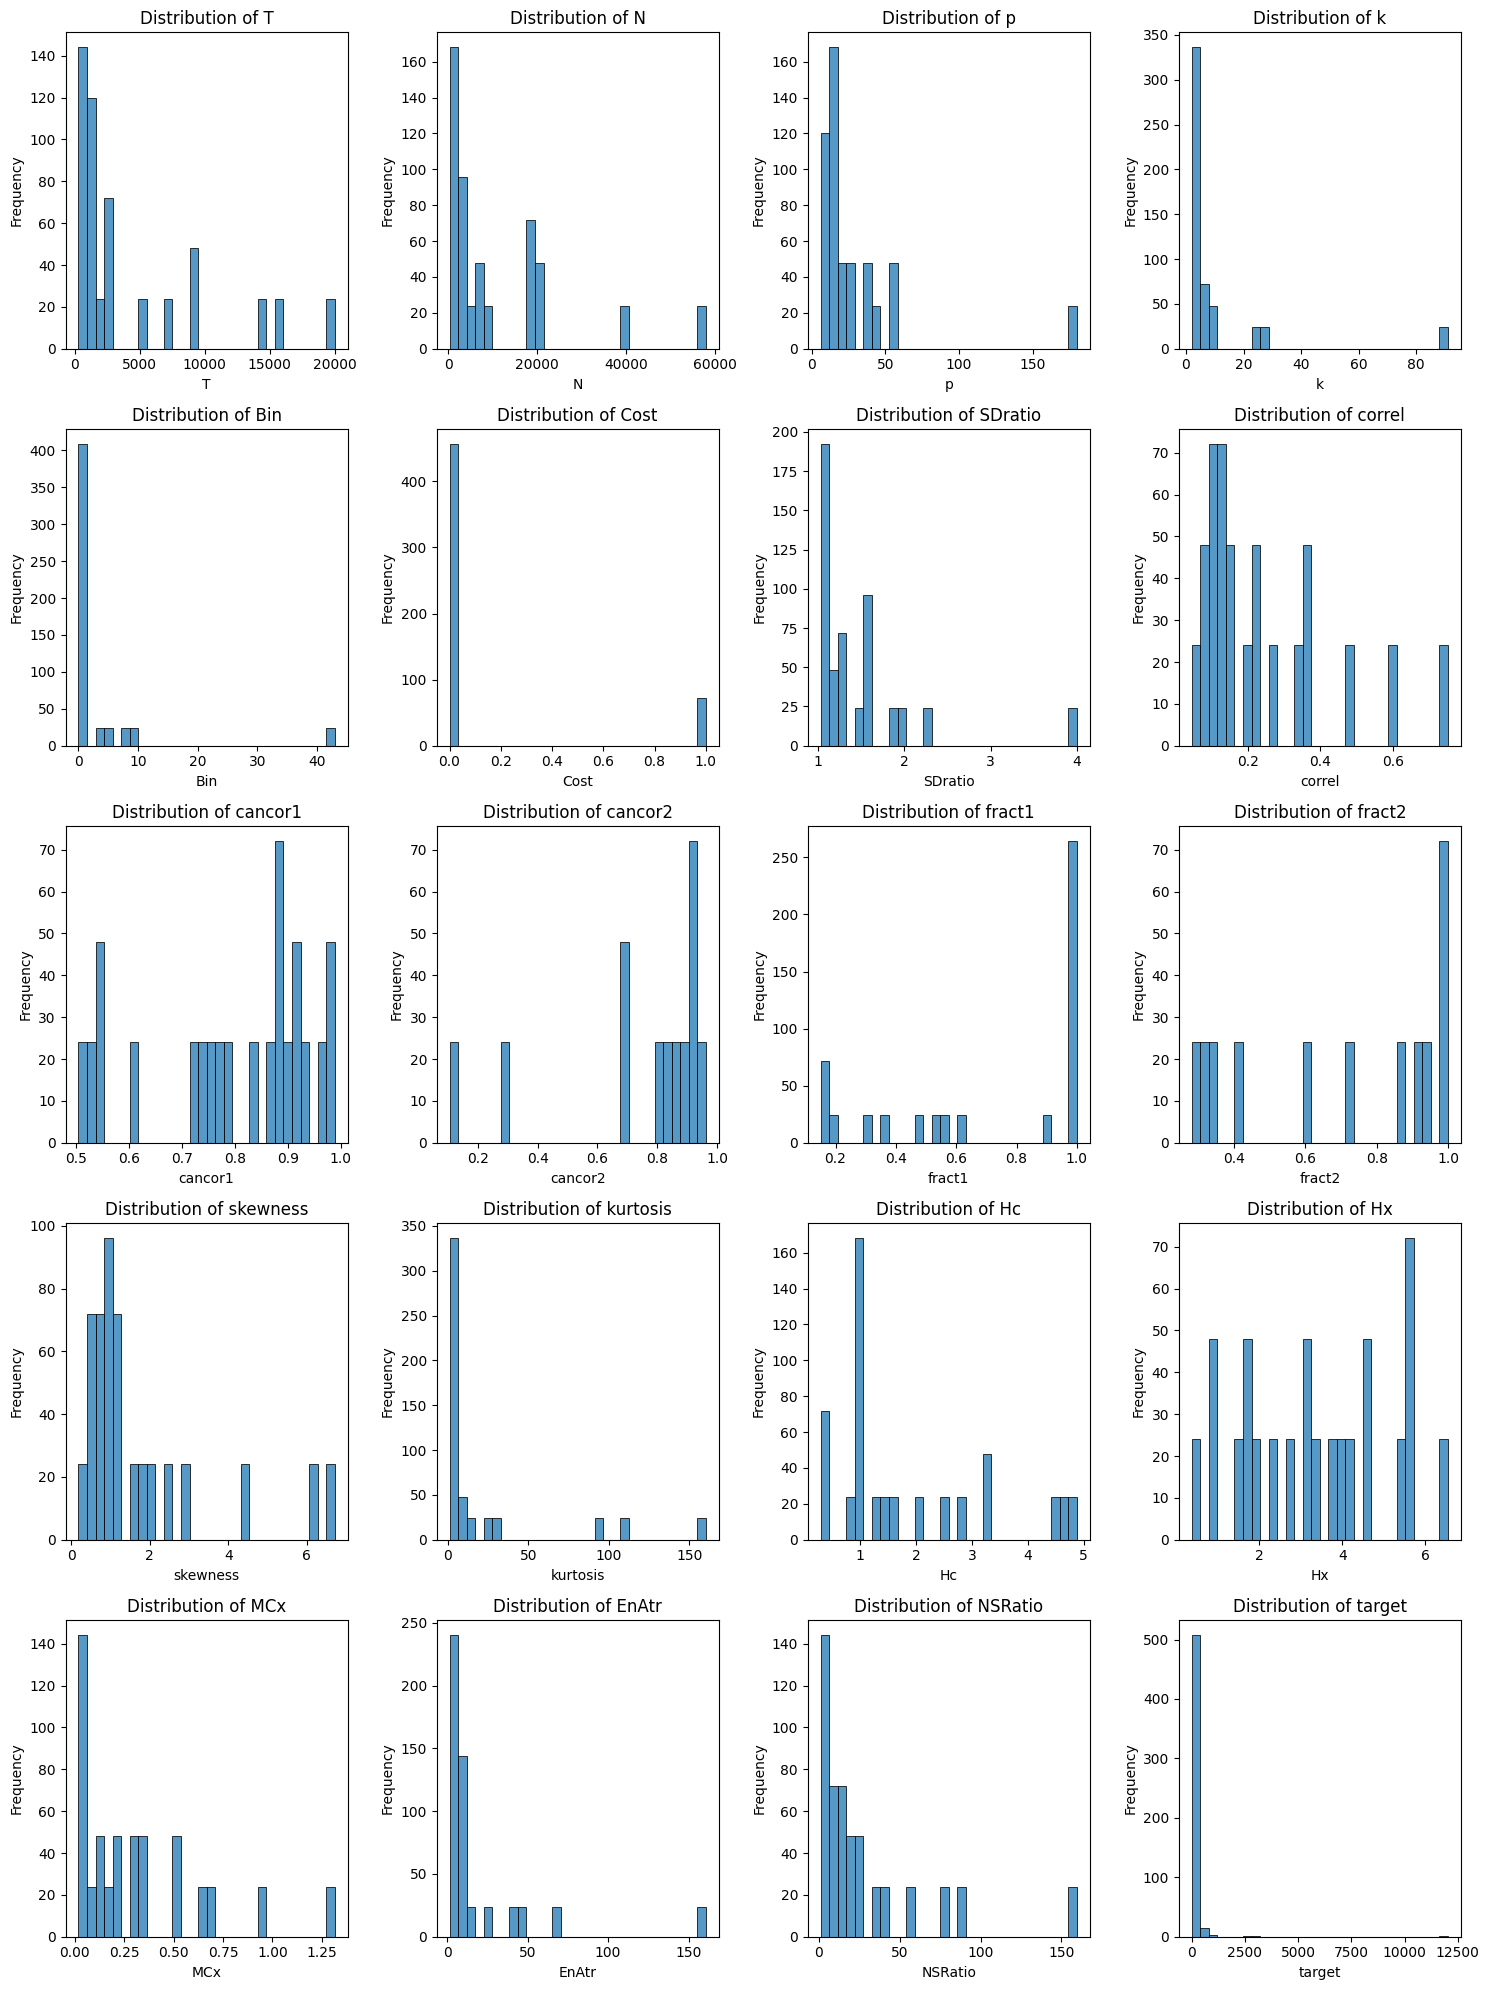

In [169]:
plot_numeric_distributions(df)

We also have plotted the relationship between each variable and the target to find potential patterns.</br>
Overall Observations:
1. The target variable does not seem to have a clear linear relationship with the predictors. This could suggest that the relationships are non-linear.

2. The presence of horizontal bands across several plots suggests that the target variable might be better analyzed with classification methods or non-linear regression if it is indeed continuous.

3. The concentration of data points at specific target variable values implies that certain outcomes are more common than others.

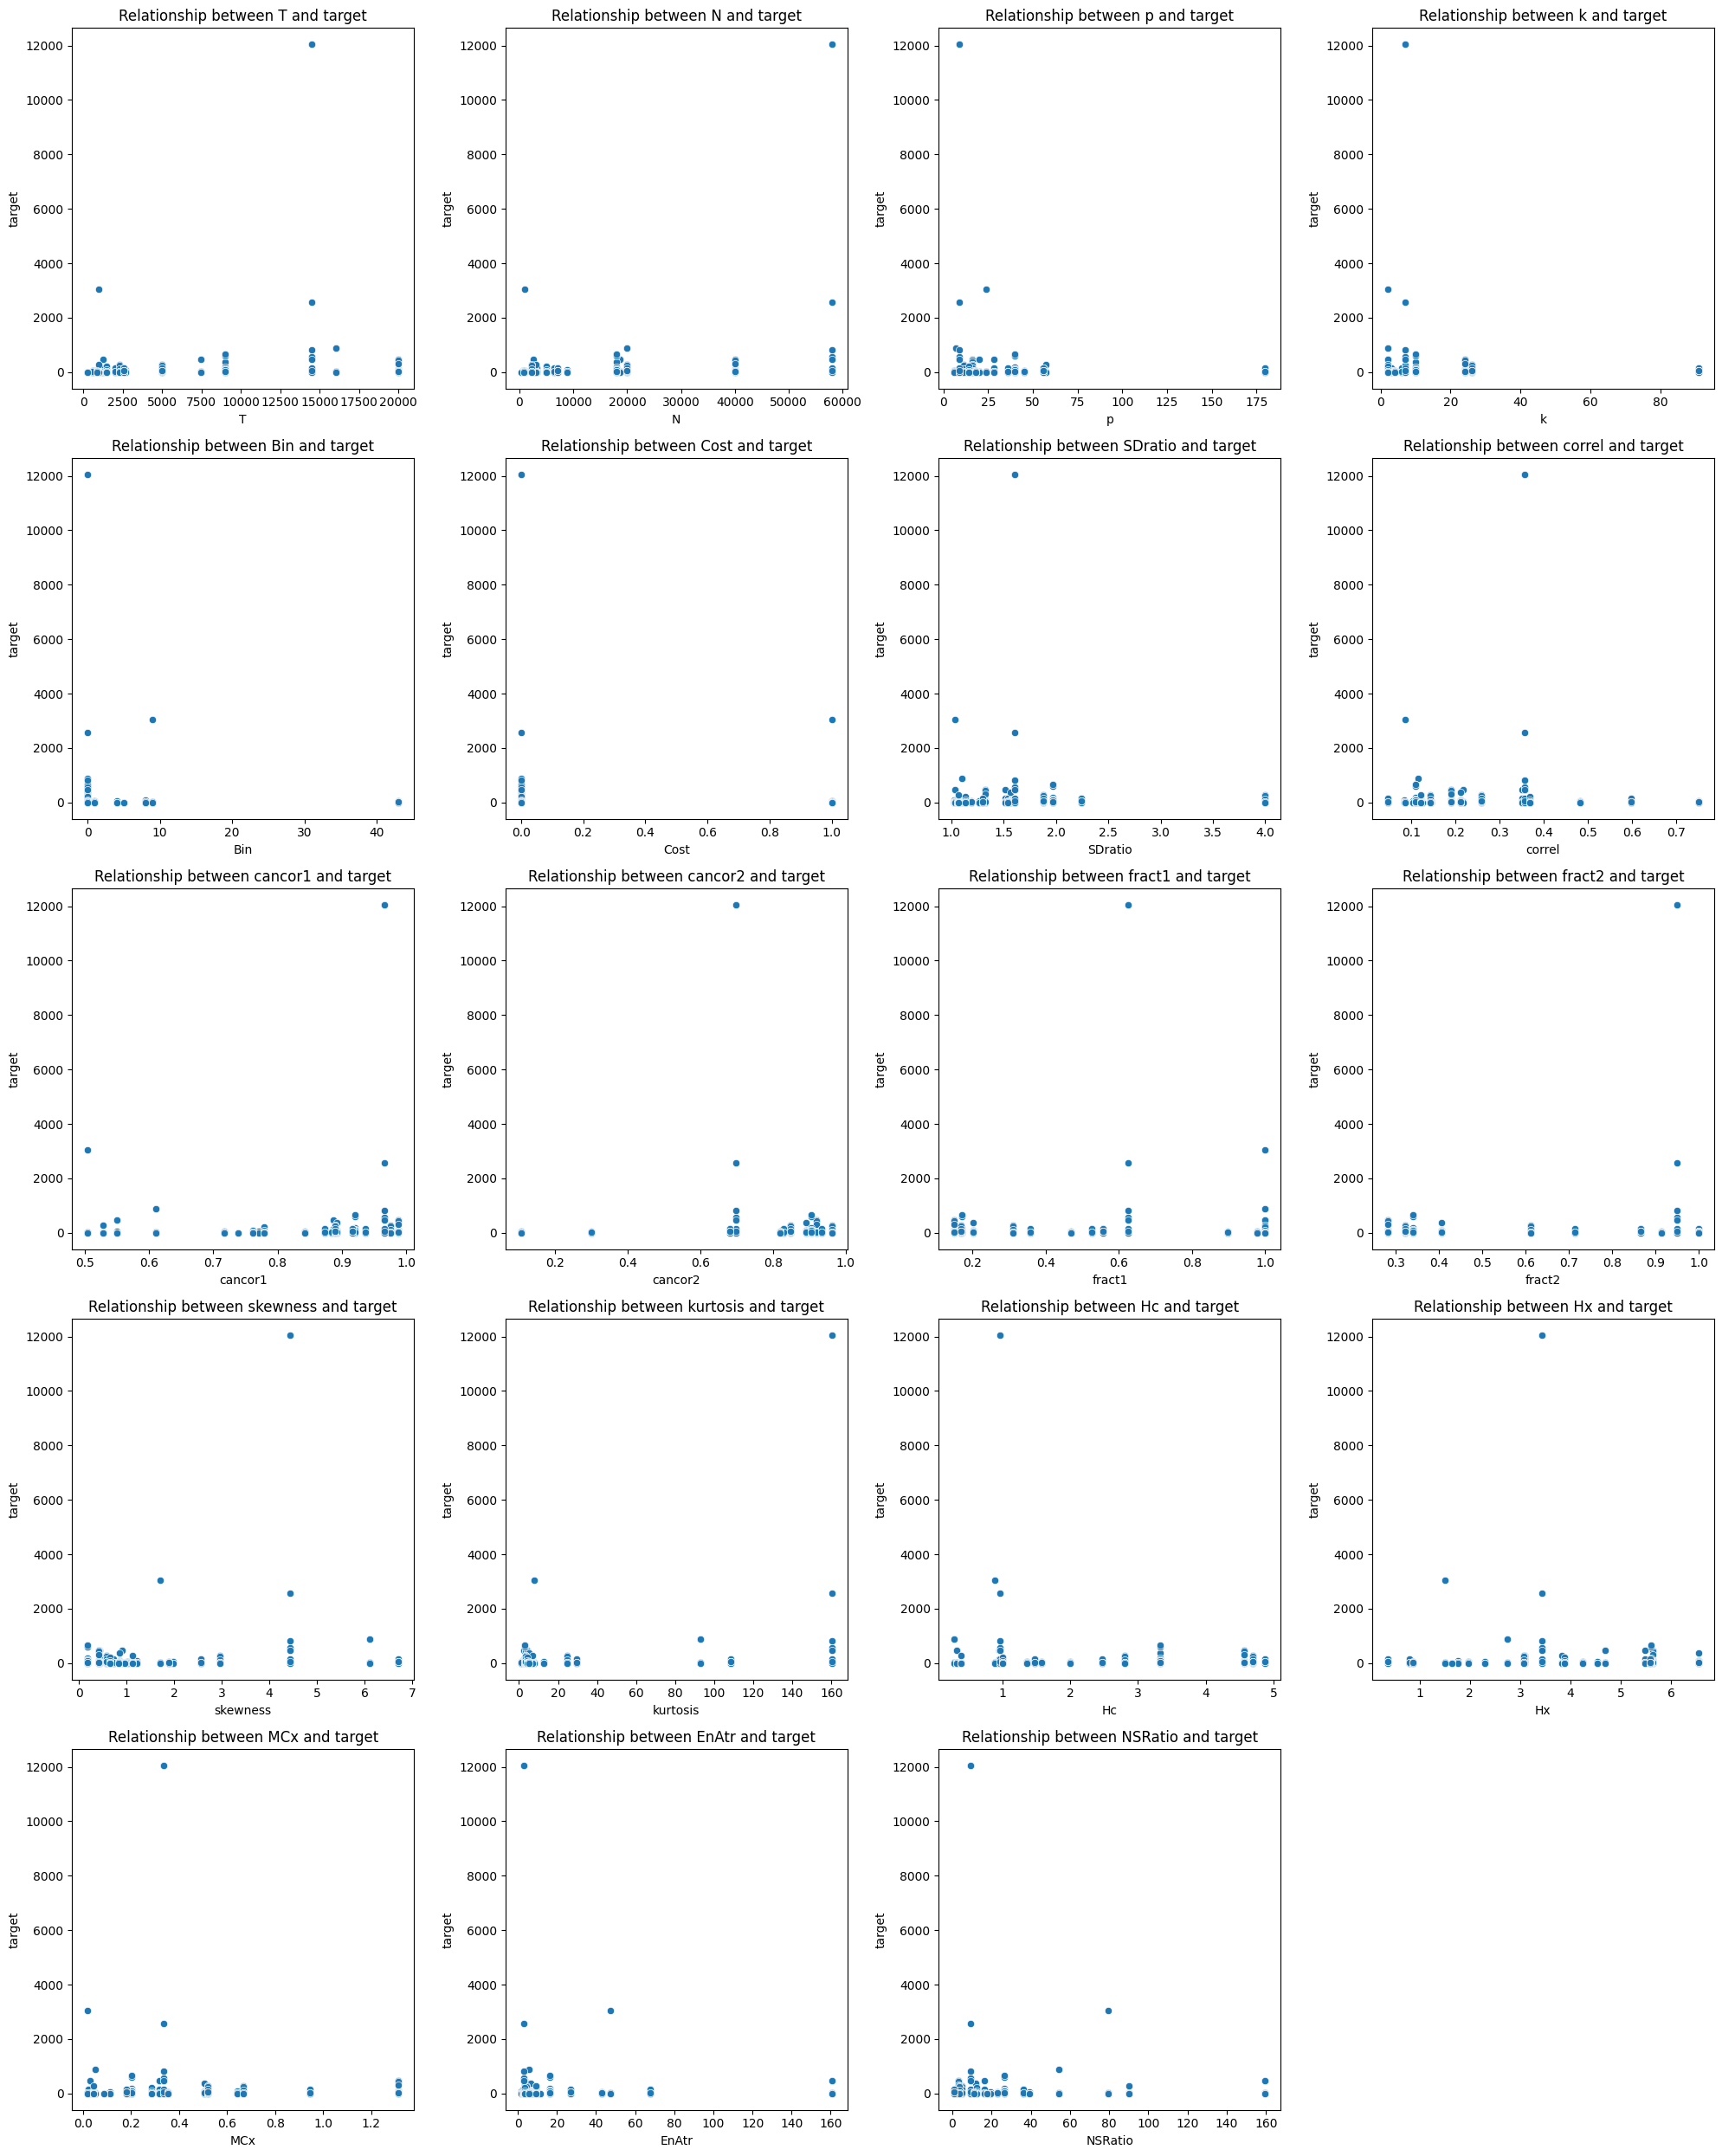

In [170]:
plot_relationships(df, 'target')

## <span style="color:#e6550d">2. Pre-Processing</span>

### <span style="color:#31a354">Original Dataset: Remove Categorical Variables</span>

First we remove the categorical variables.

Check the actual shape after removing the categorical variables.

In [171]:
# Print total number of rows and columns
print(df.shape)

(528, 22)


In [172]:
# Identifying nominal features and removing them
nominal_features = ['DS_Name', 'Alg_Name']
df = df.drop(columns=nominal_features)

Check for missing values through the variables, and count the number of them for each variable.</br>
The variables have missing values:
- correl
- cancor1
- fract2

In [173]:
# Print the number of rows with missing values
print(df.isnull().sum())

T             0
N             0
p             0
k             0
Bin           0
Cost          0
SDratio       0
correl       24
cancor1       0
cancor2     240
fract1        0
fract2      240
skewness      0
kurtosis      0
Hc            0
Hx            0
MCx           0
EnAtr         0
NSRatio       0
target        0
dtype: int64


Let analyze the three variables in detail.

In [174]:
# Print only the rows of the column "correl"
print("Correl column:")
print(df['correl'])

# Print the number of missing values in the column "correl"
print("\n")
print("Missing values in correl column:")
print(df['correl'].isnull().sum())

# Print the rows of the column "correl" with missing values
print("\n")
print("Rows with missing values in correl column:")
print(df[df['correl'].isnull()])

Correl column:
0      0.1024
1      0.1024
2      0.1024
3      0.1024
4      0.1024
        ...  
523    0.4828
524    0.4828
525    0.4828
526    0.4828
527    0.4828
Name: correl, Length: 528, dtype: float64


Missing values in correl column:
24


Rows with missing values in correl column:
          T       N     p     k  Bin  Cost  SDratio  correl  cancor1  cancor2  \
456  2580.0  7078.0  56.0  91.0  0.0   0.0   2.2442     NaN   0.9165   0.6818   
457  2580.0  7078.0  56.0  91.0  0.0   0.0   2.2442     NaN   0.9165   0.6818   
458  2580.0  7078.0  56.0  91.0  0.0   0.0   2.2442     NaN   0.9165   0.6818   
459  2580.0  7078.0  56.0  91.0  0.0   0.0   2.2442     NaN   0.9165   0.6818   
460  2580.0  7078.0  56.0  91.0  0.0   0.0   2.2442     NaN   0.9165   0.6818   
461  2580.0  7078.0  56.0  91.0  0.0   0.0   2.2442     NaN   0.9165   0.6818   
462  2580.0  7078.0  56.0  91.0  0.0   0.0   2.2442     NaN   0.9165   0.6818   
463  2580.0  7078.0  56.0  91.0  0.0   0.0   2.2442     Na

In [175]:
# Print only the rows of the column "cancor2"
print("Cancor2 column:")
print(df['cancor2'])

# Print the number of missing values in the column "cancor2"
print("\n")
print("Missing values in cancor2 column:")
print(df['cancor2'].isnull().sum())

# Print the rows of the column "cancor2" with missing values
print("\n")
print("Rows with missing values in cancor2 column:")
print(df[df['cancor2'].isnull()])

Cancor2 column:
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
523    0.8189
524    0.8189
525    0.8189
526    0.8189
527    0.8189
Name: cancor2, Length: 528, dtype: float64


Missing values in cancor2 column:
240


Rows with missing values in cancor2 column:
          T       N     p    k  Bin  Cost  SDratio  correl  cancor1  cancor2  \
0     690.0   690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713      NaN   
1     690.0   690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713      NaN   
2     690.0   690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713      NaN   
3     690.0   690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713      NaN   
4     690.0   690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713      NaN   
..      ...     ...   ...  ...  ...   ...      ...     ...      ...      ...   
499  1499.0  4999.0  14.0  2.0  0.0   0.0   1.1316  0.3676   0.7792      NaN   
500  1499.0  4999.0  14.0  2.0  0.0   0.0   1.1316  0.3676   

In [176]:
# Print only the rows of the column "fract2"
print("Fract2 column:")
print(df['fract2'])

# Print the number of missing values in the column "fract2"
print("\n")
print("Missing values in fract2 column:")
print(df['fract2'].isnull().sum())

# Print the rows of the column "fract2" with missing values
print("\n")
print("Rows with missing values in fract2 column:")
print(df[df['fract2'].isnull()])

Fract2 column:
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
523    0.9139
524    0.9139
525    0.9139
526    0.9139
527    0.9139
Name: fract2, Length: 528, dtype: float64


Missing values in fract2 column:
240


Rows with missing values in fract2 column:
          T       N     p    k  Bin  Cost  SDratio  correl  cancor1  cancor2  \
0     690.0   690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713      NaN   
1     690.0   690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713      NaN   
2     690.0   690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713      NaN   
3     690.0   690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713      NaN   
4     690.0   690.0  14.0  2.0  4.0   0.0   1.2623  0.1024   0.7713      NaN   
..      ...     ...   ...  ...  ...   ...      ...     ...      ...      ...   
499  1499.0  4999.0  14.0  2.0  0.0   0.0   1.1316  0.3676   0.7792      NaN   
500  1499.0  4999.0  14.0  2.0  0.0   0.0   1.1316  0.3676   0.77

Identifying and handling missing values by removing rows with missing values and storing the result in the dataset D1.

### <span style="color:#31a354">Dataset D1: Dataset Without Missing Values</span>

Delete data with missing values. (N.B. The dataset obtained is indicated from here on with D1)

In [177]:
# Dataset without missing values
D1 = df.dropna()

# Print the first few rows of the DataFrame
D1.head()


,T,N,p,k,Bin,Cost,SDratio,correl,cancor1,cancor2,fract1,fract2,skewness,kurtosis,Hc,Hx,MCx,EnAtr,NSRatio,target
96,20000.0,40000.0,16.0,24.0,0.0,0.0,1.3218,0.1885,0.9884,0.9191,0.1505,0.2807,0.42,4.4024,4.5603,5.6411,1.3149,3.46817,3.29014,76.475
97,20000.0,40000.0,16.0,24.0,0.0,0.0,1.3218,0.1885,0.9884,0.9191,0.1505,0.2807,0.42,4.4024,4.5603,5.6411,1.3149,3.46817,3.29014,86.162
98,20000.0,40000.0,16.0,24.0,0.0,0.0,1.3218,0.1885,0.9884,0.9191,0.1505,0.2807,0.42,4.4024,4.5603,5.6411,1.3149,3.46817,3.29014,467.007
99,20000.0,40000.0,16.0,24.0,0.0,0.0,1.3218,0.1885,0.9884,0.9191,0.1505,0.2807,0.42,4.4024,4.5603,5.6411,1.3149,3.46817,3.29014,122.360
100,20000.0,40000.0,16.0,24.0,0.0,0.0,1.3218,0.1885,0.9884,0.9191,0.1505,0.2807,0.42,4.4024,4.5603,5.6411,1.3149,3.46817,3.29014,40.787


Analyze the info of the new dataset.</br>
The dataset size has significantly decreased by 50%, moving from 528 to 264 rows. 

In [178]:
# Print information about the dataset
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 96 to 527
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T         264 non-null    float64
 1   N         264 non-null    float64
 2   p         264 non-null    float64
 3   k         264 non-null    float64
 4   Bin       264 non-null    float64
 5   Cost      264 non-null    float64
 6   SDratio   264 non-null    float64
 7   correl    264 non-null    float64
 8   cancor1   264 non-null    float64
 9   cancor2   264 non-null    float64
 10  fract1    264 non-null    float64
 11  fract2    264 non-null    float64
 12  skewness  264 non-null    float64
 13  kurtosis  264 non-null    float64
 14  Hc        264 non-null    float64
 15  Hx        264 non-null    float64
 16  MCx       264 non-null    float64
 17  EnAtr     264 non-null    float64
 18  NSRatio   264 non-null    float64
 19  target    264 non-null    float64
dtypes: float64(20)
memory usage: 43

In [179]:
D1.shape

(264, 20)

Compare the dataset D1 with the original dataset:

1. **Frequency**: Due to the different size there is a noticeable difference in the frequency scales between the two sets of histograms. 

2. **Target Variable**:
   - The distribution of the target variable has a different shape and range between the two datasets. In D1, the target variable's frequency is more concentrated in the lower values, whereas in the original dataset, there's a more uniform distribution across values, with a slightly higher concentration in the higher values.

3. **Consistency Across Variables**:
   - Some variables like 'cancor1' and 'cancor2' show a high level of consistency between the two sets, with similar distributions. This suggests that the relationship between these variables and the target might be stable across the two datasets.

In the next section we investigate more deeply in the target variable regarding the number of unique values in dataset D1.<br>

**Observations**:
- The results shows that there are 22 duplicate target values, the total number of instances that have the same output of another are 231, and only 33 instances has a unique value. 

In [198]:
# Count how many times a target values exist more then 1 time 
total_instances = D1.shape[0]
unique_counts = D1['target'].value_counts()
filtered_counts = unique_counts[unique_counts > 1]

# To display the results
print(f"Number of target values repeated more then 1 time:\n{len(filtered_counts)}")
print(f"Number of instances that have the same target value than another:\n{len(unique_counts)}")
print(f"Number of instances with a unique target value:\n{total_instances - len(unique_counts)}")
print(f"Target value and number of repetitions:\n{filtered_counts} ")


Number of target values repeated more then 1 time:
22
Number of instances that have the same target value than another:
231
Number of instances with a unique target value:
33
Target value and number of repetitions:
-0.150978     11
 0.290977      3
-0.142856      3
-0.148699      2
-0.140971      2
-0.144596      2
 0.006644      2
-0.141280      2
 11.244090     2
-0.101974      2
 0.104932      2
-0.148312      2
-0.148019      2
-0.142102      2
-0.101491      2
-0.150711      2
-0.048373      2
 0.477476      2
-0.139568      2
-0.115707      2
-0.142396      2
-0.141144      2
Name: target, dtype: int64 


(Optional) Plot the distribution of the data of the dataset D1

In [180]:
if extra_plots: plot_numeric_distributions(D1)

Once the dataframe has been created, use the interpolated Pandas function, which automatically interpolates the missing data (N.B. The dataset obtained is indicated from here on with D2). Use this configuration (both DF the 
 Dataframe on which to apply this method): DF = DF. Interpolated (Method = 'CubicsPLine', Limit Direction = 'Both', Axis = 0)

### <span style="color:#31a354">Dataset D2: Dataset With Interpolation Techniques</span>

Creating a new DataFrame D2 by interpolating missing values in the original DataFrame.</br>
Information about the technique used.</br>

The `interpolate()` function in pandas is used to fill in missing values (NaNs) within a DataFrame.

- `method='cubicspline'`: This specifies the interpolation technique to be used. A cubic spline is a smooth, piecewise-defined function built from cubic polynomials, which is used to approximate the underlying function that the data points might represent. It ensures that the interpolated values will form a smooth curve that fits closely to the actual data points.

- `limit_direction='both'`: This parameter determines the direction in which to apply the interpolation. When set to 'both', it means that pandas will fill missing values in both forward and backward directions (i.e., it will not only fill NaNs using the values that come before them but also using the values that come after them).

- `axis=0`: This indicates that the interpolation should be applied vertically, column by column.

When you apply this method to a DataFrame, pandas will go through each column and replace missing values with the result of the cubic spline interpolation, based on the non-missing values in that column. This type of interpolation is often used when the data is believed to follow a non-linear pattern, and you require a smooth approximation of the missing values rather than a linear one.

In [181]:
# Creating a new DataFrame D2 by interpolating missing values in the original DataFrame
D2 = df.interpolate(method='cubicspline', limit_direction='both', axis=0)

# Print the first few rows of the DataFrame
D2.head()


,T,N,p,k,Bin,Cost,SDratio,correl,cancor1,cancor2,fract1,fract2,skewness,kurtosis,Hc,Hx,MCx,EnAtr,NSRatio,target
0,690.0,690.0,14.0,2.0,4.0,0.0,1.2623,0.1024,0.7713,0.9191,1.0,0.2807,1.9701,12.5538,0.9912,2.3012,0.113,8.77168,19.3646,3.893
1,690.0,690.0,14.0,2.0,4.0,0.0,1.2623,0.1024,0.7713,0.9191,1.0,0.2807,1.9701,12.5538,0.9912,2.3012,0.113,8.77168,19.3646,5.450
2,690.0,690.0,14.0,2.0,4.0,0.0,1.2623,0.1024,0.7713,0.9191,1.0,0.2807,1.9701,12.5538,0.9912,2.3012,0.113,8.77168,19.3646,1.791
3,690.0,690.0,14.0,2.0,4.0,0.0,1.2623,0.1024,0.7713,0.9191,1.0,0.2807,1.9701,12.5538,0.9912,2.3012,0.113,8.77168,19.3646,1.557
4,690.0,690.0,14.0,2.0,4.0,0.0,1.2623,0.1024,0.7713,0.9191,1.0,0.2807,1.9701,12.5538,0.9912,2.3012,0.113,8.77168,19.3646,3.114


Analyze the info of the new dataset.</br>
The number of rows are the same as in the original dataset.

In [182]:
D2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T         528 non-null    float64
 1   N         528 non-null    float64
 2   p         528 non-null    float64
 3   k         528 non-null    float64
 4   Bin       528 non-null    float64
 5   Cost      528 non-null    float64
 6   SDratio   528 non-null    float64
 7   correl    528 non-null    float64
 8   cancor1   528 non-null    float64
 9   cancor2   528 non-null    float64
 10  fract1    528 non-null    float64
 11  fract2    528 non-null    float64
 12  skewness  528 non-null    float64
 13  kurtosis  528 non-null    float64
 14  Hc        528 non-null    float64
 15  Hx        528 non-null    float64
 16  MCx       528 non-null    float64
 17  EnAtr     528 non-null    float64
 18  NSRatio   528 non-null    float64
 19  target    528 non-null    float64
dtypes: float64(20)
memory usage: 82.

In [183]:
D2.shape

(528, 20)

In the next section we investigate more deeply in the target variable regarding the number of unique values in dataset D2.<br>

**Observations**:
- The results shows that there are 55 duplicate target values, the total number of instances that have the same output of another are 436, and only 92 instances has a unique value. 

In [199]:
# Count how many times a target values exist more then 1 time 
total_instances = D2.shape[0]
unique_counts = D2['target'].value_counts()
filtered_counts = unique_counts[unique_counts > 1]

# To display the results
print(f"Number of target values repeated more then 1 time:\n{len(filtered_counts)}")
print(f"Number of instances that have the same target value than another:\n{len(unique_counts)}")
print(f"Number of instances with a unique target value:\n{total_instances - len(unique_counts)}")
print(f"Target value and number of repetitions:\n{filtered_counts} ")


Number of target values repeated more then 1 time:
55
Number of instances that have the same target value than another:
436
Number of instances with a unique target value:
92
Target value and number of repetitions:
-0.130323     24
 0.081113      6
-0.117856      5
-0.113542      4
-0.119088      3
-0.126774      3
-0.117312      3
 0.481030      3
-0.125227      3
-0.129303      3
 0.473165      2
-0.123451      2
-0.120327      2
 15.632382     2
-0.061868      2
-0.129074      2
 0.223675      2
-0.127330      2
-0.124610      2
-0.118452      2
-0.122433      2
-0.081533      2
-0.062537      2
-0.116720      2
-0.127033      2
-0.127171      2
-0.117606      2
-0.126139      2
-0.126924      2
-0.124571      2
-0.116481      2
-0.121496      2
-0.129954      2
-0.126231      2
-0.126635      2
 0.087713      2
-0.122282      2
-0.118045      2
-0.116909      2
-0.125572      2
-0.129958      2
 0.011610      2
 0.739012      2
-0.127534      2
-0.123597      2
-0.041757      2
-0.

Check for missing values in dataset D2.<br>
As expected there are no missing values.

In [184]:
# Print the number of rows with missing values
print(D2.isnull().sum())

T           0
N           0
p           0
k           0
Bin         0
Cost        0
SDratio     0
correl      0
cancor1     0
cancor2     0
fract1      0
fract2      0
skewness    0
kurtosis    0
Hc          0
Hx          0
MCx         0
EnAtr       0
NSRatio     0
target      0
dtype: int64


Compare the original data of the three variables with missing values, with the same variables after interpolation.<br>
We print the added data, and we plot the original variables and the variables after interpolation, one on top of the other, to better appreciate the differences.

Correl variable.

Interpolated values in correl column:
456    0.355882
457    0.356062
458    0.356330
459    0.356679
460    0.357101
461    0.357585
462    0.358125
463    0.358712
464    0.359336
465    0.359990
466    0.360666
467    0.361354
468    0.362046
469    0.362734
470    0.363410
471    0.364064
472    0.364688
473    0.365275
474    0.365815
475    0.366299
476    0.366721
477    0.367070
478    0.367338
479    0.367518
Name: correl, dtype: float64


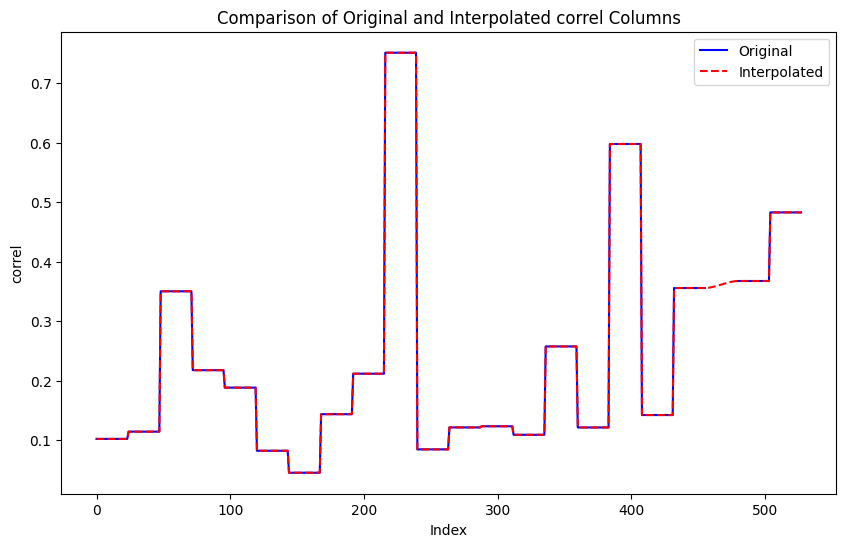

In [185]:
# Identify where the missing values were in the original DataFrame
missing_values = df['correl'].isnull()

# Extract the corresponding interpolated values from D2
interpolated_values = D2['correl'][missing_values]

# Print the interpolated values
print("Interpolated values in correl column:")
print(interpolated_values)

# Plot the original and interpolated values
plot_original_vs_interpolated(df, D2, 'correl')

Cancor2 variable.

Interpolated values in cancor2 column:
0      0.919100
1      0.919100
2      0.919100
3      0.919100
4      0.919100
         ...   
499    0.803789
500    0.808682
501    0.812738
502    0.815859
503    0.817946
Name: cancor2, Length: 240, dtype: float64


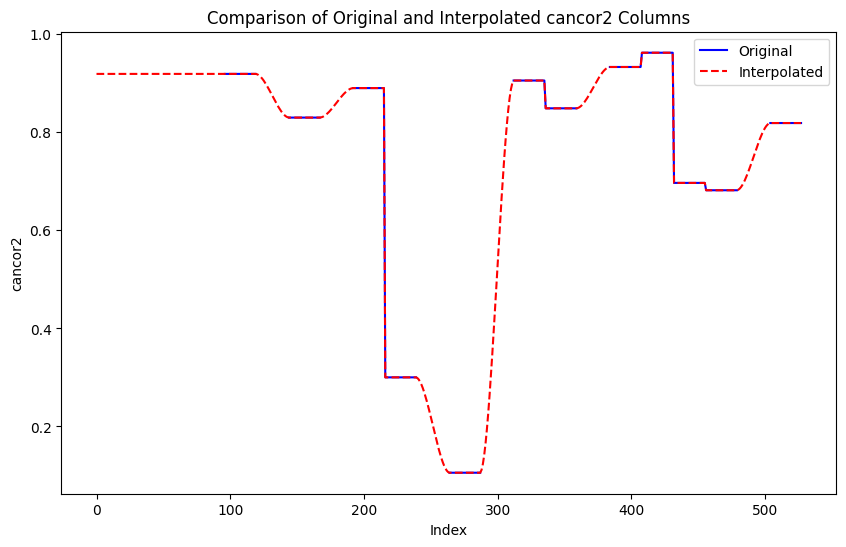

In [186]:
# Identify where the missing values were in the original DataFrame
missing_values = df['cancor2'].isnull()

# Extract the corresponding interpolated values from D2
interpolated_values = D2['cancor2'][missing_values]

# Print the interpolated values
print("Interpolated values in cancor2 column:")
print(interpolated_values)

# Plot the original and interpolated values
plot_original_vs_interpolated(df, D2, 'cancor2')

Fract2 variable.

Interpolated values in fract2 column:
0      0.280700
1      0.280700
2      0.280700
3      0.280700
4      0.280700
         ...   
499    0.908620
500    0.910330
501    0.911747
502    0.912837
503    0.913567
Name: fract2, Length: 240, dtype: float64


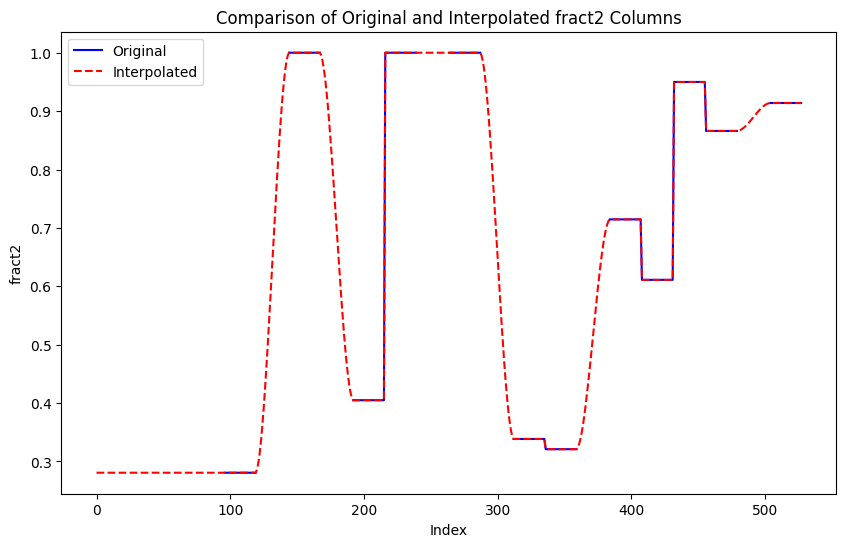

In [187]:
# Identify where the missing values were in the original DataFrame
missing_values = df['fract2'].isnull()

# Extract the corresponding interpolated values from D2
interpolated_values = D2['fract2'][missing_values]

# Print the interpolated values
print("Interpolated values in fract2 column:")
print(interpolated_values)

# Plot the original and interpolated values
plot_original_vs_interpolated(df, D2, 'fract2')

(Optional) Show the distribution of the data after the interpolation process.

In [188]:
if extra_plots: plot_numeric_distributions(D2)

### <span style="color:#31a354">Standardized Datasets</span>

Standardize the datasets.<br>
To increase the performance of the models we perform a standardization of the data.<br>
The main reasons for standardizing data are:

1. **Uniformity in Scale**: Many machine learning algorithms, particularly those involving techniques like linear regression, and support vector machines, assume that all features are centered around zero and have variance in the same order. If a feature's variance is orders of magnitude more than others, it might dominate the objective function and make the estimator unable to learn from other features correctly.

2. **Improved Convergence**: In gradient descent optimization, features with different scales will contribute unequally to the total error and might result in an oscillating or slow convergence trajectory. Standardizing features so that they are on the same scale can speed up convergence.

3. **Interpretability of Models**: When features are standardized, the importance of features can be more easily interpreted, particularly in models that assign importance weights or coefficients to features, such as linear regression.

Standardization typically involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.<br>
The new datasets are now D1_standardized, and D2_standardized

In [189]:
# Standardize D1 and D2
D1_standardized, D2_standardized = standardize_datasets(D1, D2)

(Optional) Plot the distribution of the data D1 after standardization.

In [190]:
if extra_plots: plot_numeric_distributions(pd.DataFrame(D1_standardized, columns=D1.columns))

(Optional) Plot the distribution of the data D2 after standardization.

In [191]:
if extra_plots: plot_numeric_distributions(pd.DataFrame(D2_standardized, columns=D2.columns))

## <span style="color:#e6550d">3. Regression</span>

### <span style="color:#31a354">Research Questions</span>

Divide both dataset into training and test set in an appropriate way. Use for both following regression models, leaving the default parameters:
- Linear Regression; 
- Support Vector; 
- Decision Trees;
- Random Forest;
- Gradient Boosting;
- <span style="color:red">Logistic Regression</span>.

Train and test the previous models on both D1 and D2.</br>
Report the results in terms of:
- MAE;
- MAPE;
- SMAPE.

#### <span style="color:#3182bd">Overview of the models and metrics used</span>

**Metrics Used**:
   1. **MAE (Mean Absolute Error)**: Represents the average absolute difference between the predicted and actual values. Lower values indicate better performance.
   2. **MAPE (Mean Absolute Percentage Error)**: Expresses accuracy as a percentage of the error. Again, lower values are better.
   3. **SMAPE (Symmetric Mean Absolute Percentage Error)**: Similar to MAPE but symmetric, taking the absolute difference between the predicted and actual divided by the sum of the absolute values of the predicted and actual. Lower values indicate better predictions.

**Models Used**:

1. **Linear Regression**:
    - **Purpose**: Used for predicting a continuous target variable based on one or more input features.
    - **Assumptions**: Assumes a linear relationship between input and output variables.
    - **Advantages**: Simple to understand and interpret, works well with numerical and categorical features.
    - **Disadvantages**: Can be prone to overfitting, especially with many features; sensitive to outliers.

2. **Support Vector Machine (SVM)**:
    - **Purpose**: Primarily used for classification tasks but can be extended to regression.
    - **Principle**: Tries to find the best hyperplane that separates classes in the feature space.
    - **Advantages**: Effective in high-dimensional spaces, works well with a clear margin of separation.
    - **Disadvantages**: Less effective on noisier datasets with overlapping classes; requires careful tuning of parameters.

3. **Decision Tree**:
    - **Purpose**: Used for both classification and regression tasks.
    - **Principle**: Splits the data into subsets based on feature value thresholds, forming a tree structure.
    - **Advantages**: Easy to understand and interpret, requires little data preparation.
    - **Disadvantages**: Can easily overfit, sensitive to small variations in the data.

4. **Random Forest**:
    - **Purpose**: An ensemble method primarily used for classification and regression.
    - **Principle**: Builds multiple decision trees and merges them to get a more accurate and stable prediction.
    - **Advantages**: Reduces the risk of overfitting, handles large datasets with higher dimensionality.
    - **Disadvantages**: More complex and computationally intensive, less intuitive than a single decision tree.

5. **Gradient Boosting**:
    - **Purpose**: An ensemble technique used for both regression and classification tasks.
    - **Principle**: Builds trees sequentially, with each tree trying to correct the errors of its predecessor.
    - **Advantages**: Often provides predictive accuracy that cannot be beaten.
    - **Disadvantages**: More prone to overfitting if not properly tuned, more challenging to implement and understand.

#### <span style="color:red">The problem in using Logistic Regression with the dataset Meta</span>

The inability to use logistic regression effectively with the Meta dataset can be attributed to several key factors related to the nature of both the logistic regression model and the dataset itself.<br>
The main reasons are highlighted here:

1. **Nature of the Target Variable**:
   - Logistic regression is fundamentally designed for binary or categorical outcomes. It models the probability that a given input point belongs to a certain category, typically a binary outcome (like 0/1, yes/no).
   - The dataset Meta has a continuous target variable. Logistic regression is not suitable for modeling continuous variables since it cannot predict a range of numeric values, only the probability of belonging to a class.

2. **Output Interpretation**:
   - Logistic regression outputs probabilities, not continuous numbers. It predicts the likelihood of an observation belonging to one of the classes in a classification problem.
   - The target variable is continuous and not categorical, using logistic regression would be inappropriate as it would not provide meaningful predictions. It cannot capture the nuances or the range of continuous data.

### <span style="color:#31a354">Training and Validation</span>

In [192]:
#  Use the standardized datasets to train and evaluate the models
D1 = pd.DataFrame(D1_standardized, columns=D1.columns)
D2 = pd.DataFrame(D2_standardized, columns=D2.columns)


# Data preparation
y_d1 = D1['target']
X_d1 = D1.drop('target', axis=1)
X_train_d1, X_test_d1, y_train_d1, y_test_d1 = train_test_split(X_d1, y_d1, test_size=0.2)

y_d2 = D2['target']
X_d2 = D2.drop('target', axis=1)
X_train_d2, X_test_d2, y_train_d2, y_test_d2 = train_test_split(X_d2, y_d2, test_size=0.2)

# Training and evaluation on D1 and D2 dataset
results_d1 = train_and_evaluate(X_train_d1, X_test_d1, y_train_d1, y_test_d1)
results_d2 = train_and_evaluate(X_train_d2, X_test_d2, y_train_d2, y_test_d2)

# Convert the results to DataFrames to display in a tabular format
results_df_d1 = pd.DataFrame(results_d1).T
results_df_d2 = pd.DataFrame(results_d2).T

print("Results on D1:")
print(results_df_d1)

print("\nResults on D2:")
print(results_df_d2)


Results on D1:
                       MAE     MAPE    SMAPE
Linear Regression  0.30081  1.14036  0.31917
Support Vector     0.29498  0.64266  0.46977
Decision Trees     0.30068  1.13869  0.31693
Random Forest      0.30321  1.17923  0.32903
Gradient Boosting  0.30068  1.13867  0.31692

Results on D2:
                       MAE     MAPE    SMAPE
Linear Regression  0.37144  1.13210  0.37153
Support Vector     0.40552  0.93828  0.64744
Decision Trees     0.36547  1.11986  0.31855
Random Forest      0.37528  1.16782  0.33582
Gradient Boosting  0.36338  1.06534  0.31938


**Model Performance Analysis on Datasets D1 and D2**

**Observations on D1**:
- **Linear Regression** has moderate error metrics, which is expected given the smaller dataset size, potentially leading to a more tailored fit.
- **Support Vector** model has the lowest MAPE, suggesting it is better at dealing with percentage errors relative to true values in a smaller dataset.
- **Decision Trees** and **Gradient Boosting** share the exact MAE and very close MAPE values, but both have the lowest SMAPE, indicating effective handling of symmetrical errors.

**Observations on D2**:
- **Linear Regression** shows an increase in all error metrics compared to D1, possibly struggling with the larger dataset size and interpolated values.
- **Support Vector** has a notably higher SMAPE on D2, indicating challenges with the interpolation and a potential increase in both overestimations and underestimations.
- **Decision Trees** show an improvement in MAPE, suggesting that the model is less sensitive to the increased dataset size and interpolated values.
- **Random Forest** and **Gradient Boosting** both have increased MAE and MAPE but maintain a relatively stable SMAPE, demonstrating their robustness to interpolated data.

To better understand the results we conducted an investigation on feature importance.

**Understanding Feature Importance**

**Introduction**
Feature importance refers to the techniques for assigning scores to input features based on how useful they are at predicting a target variable. Understanding feature importance can lead to insights into the dataset and the model's behavior. For example Knowing which features are less important can lead to model simplification by removing these features. This can reduce model complexity, improve generalization, and decrease overfitting. By the fact we have different datasets, we can analysis how the features can influence the same model based on the size and type of the data.

**Methods for Determining Feature Importance**
Different models have different methods for calculating feature importance:
- **Coefficients in Linear Models**: In linear models (like Linear Regression), the coefficients can be used to represent the importance of features. The size and sign of the coefficients indicate the extent and direction of the impact on the target variable.

- **Tree-based Models**: Models like Decision Trees, Random Forests, and Gradient Boosting Machines have a built-in `feature_importances_` attribute.

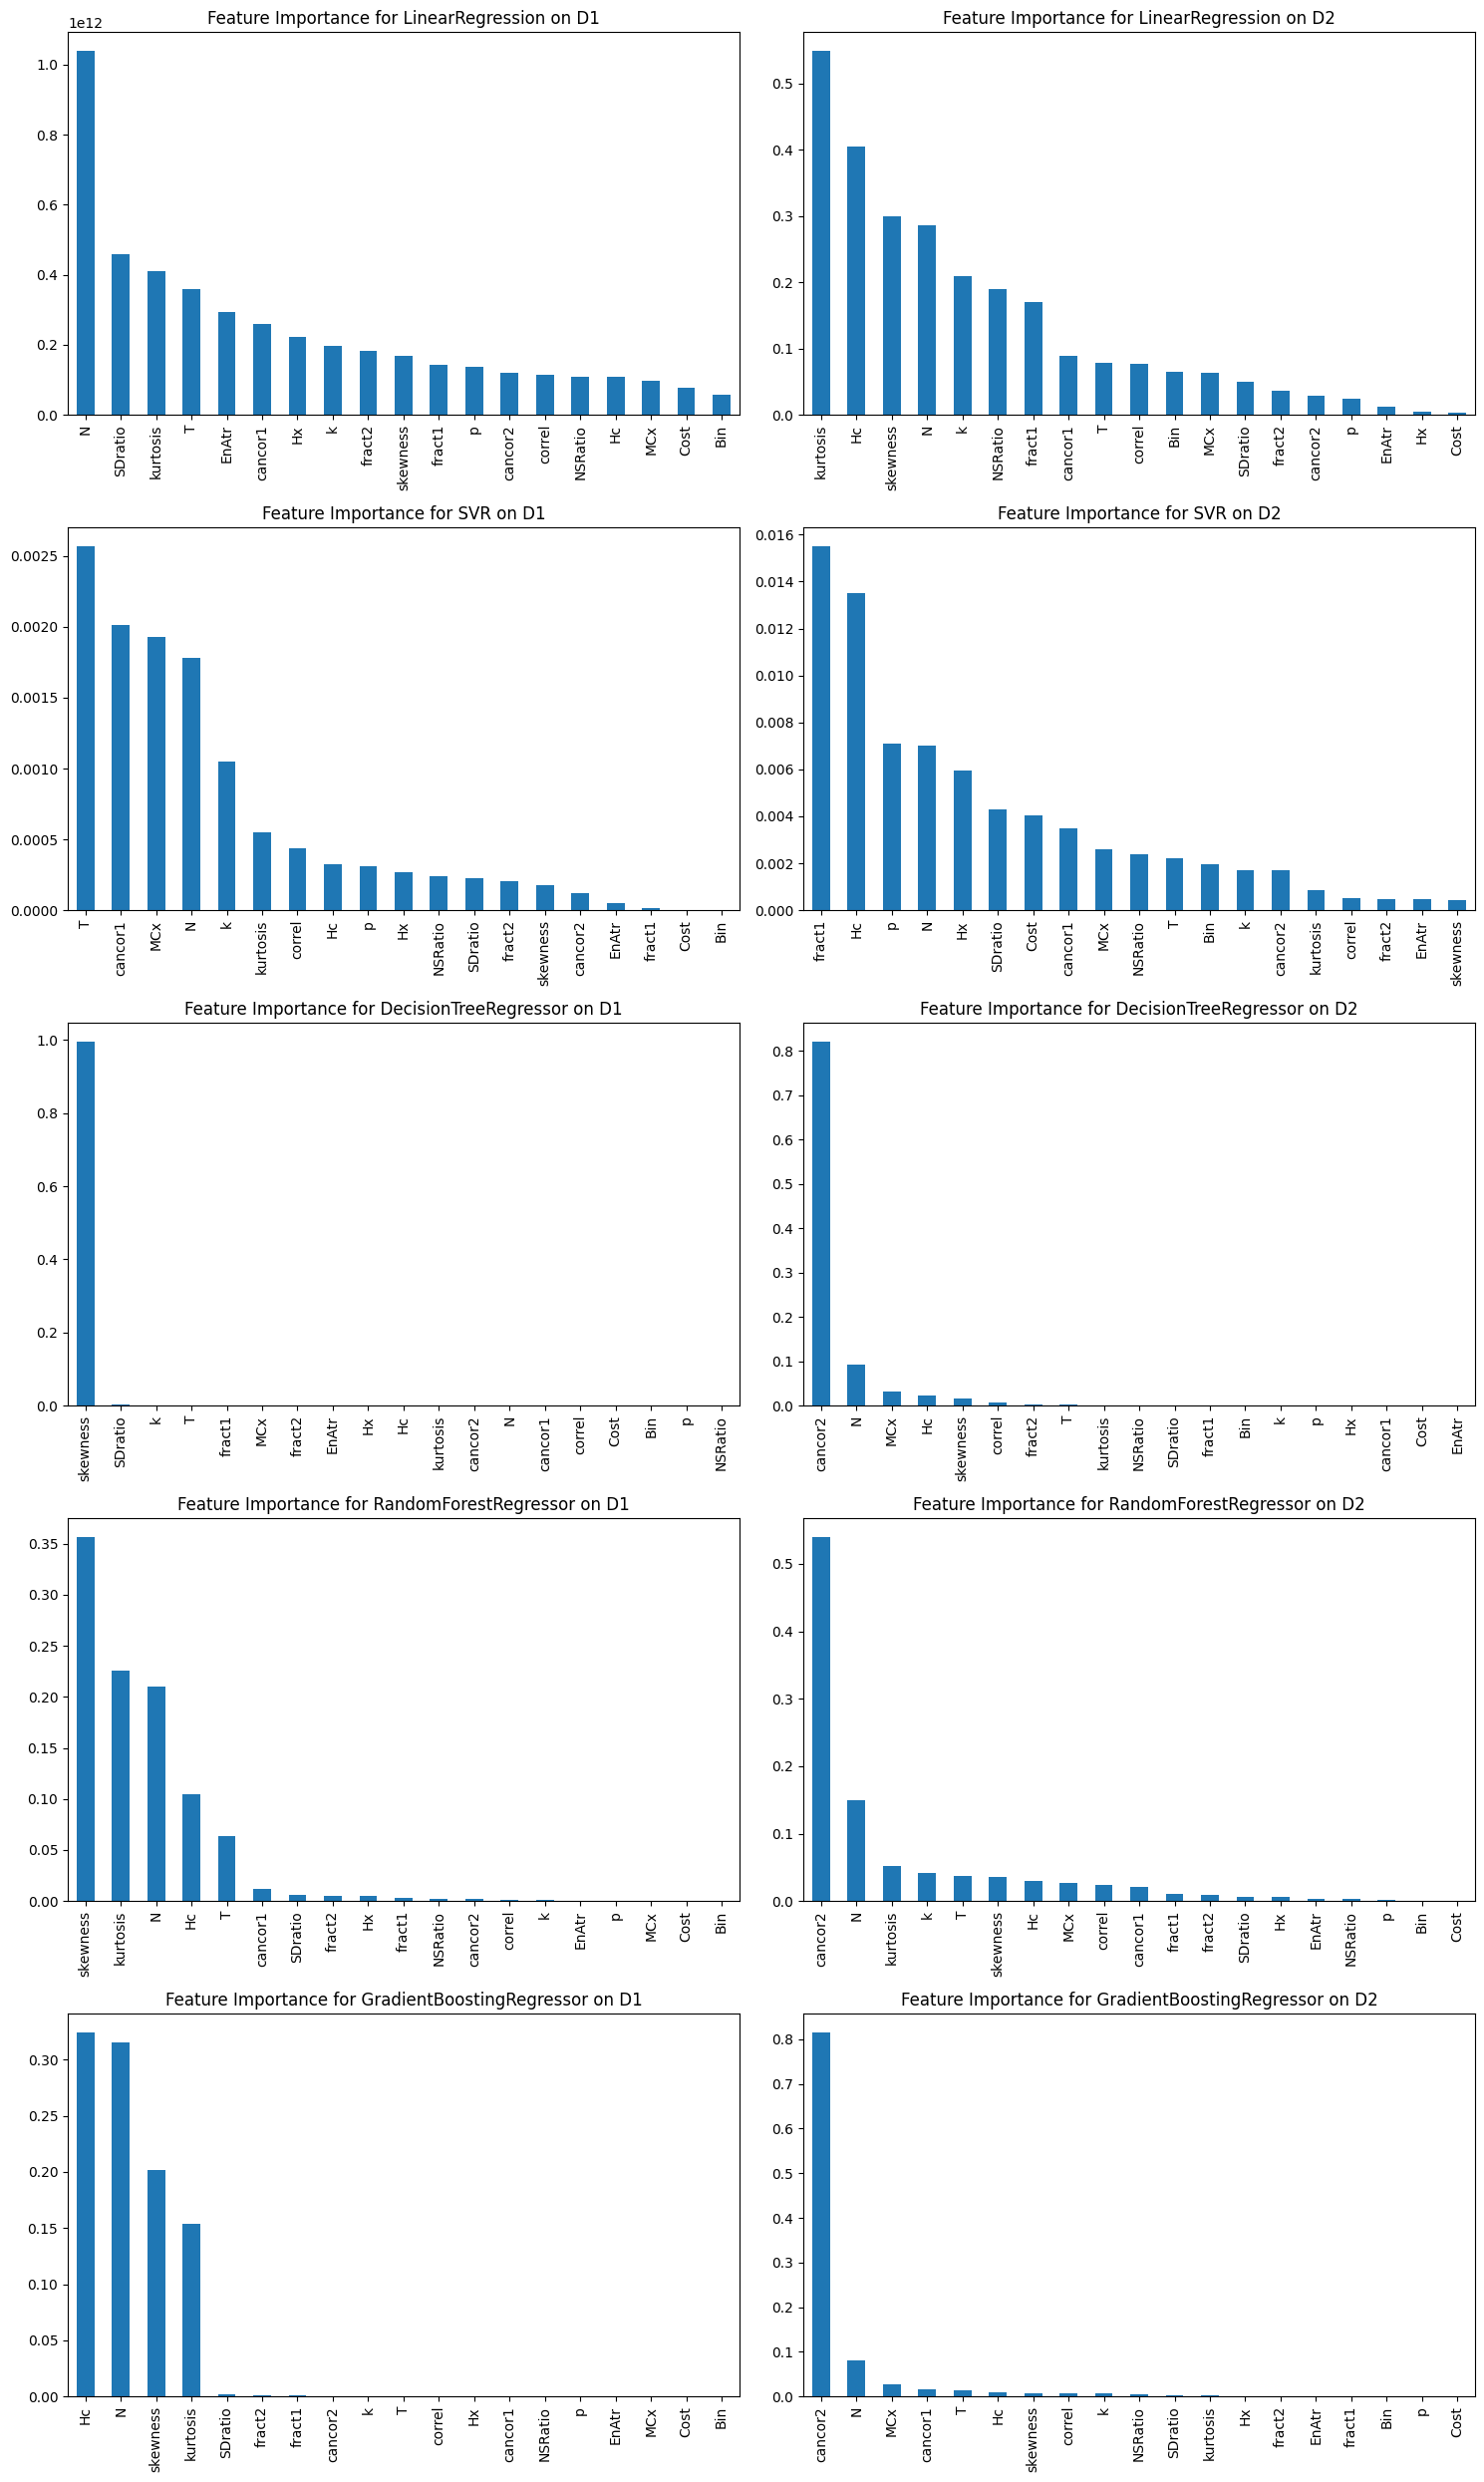

In [193]:
regressors = [
    LinearRegression(),
    SVR(kernel='linear'),  # Ensure linear kernel for feature interpretation
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

datasets = [
    (X_train_d1, y_train_d1, 'D1'),
    (X_train_d2, y_train_d2, 'D2')
]

# Create a figure with subplots - 2 columns for each dataset and rows for each model
n_models = len(regressors)
fig, axes = plt.subplots(n_models, 2, figsize=(15, 5 * n_models))  # Adjust figsize as needed

for i, regressor in enumerate(regressors):
    for j, (X_train, y_train, dataset_name) in enumerate(datasets):
        regressor.fit(X_train, y_train)

        # Check if the model has 'feature_importances_'
        if hasattr(regressor, 'feature_importances_'):
            importances = regressor.feature_importances_
        # For models without 'feature_importances_', use 'coef_' (for linear models)
        elif hasattr(regressor, 'coef_'):
            # Take absolute value of coefficients for importance
            importances = np.abs(regressor.coef_)
            if len(importances.shape) > 1:  # Handling the case where coef_ returns a 2D array
                importances = importances[0]

        # Create a series of feature importances
        feature_names = X_train.columns
        feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

        # Plot on the corresponding subplot
        ax = axes[i, j]
        feature_importances.plot(kind='bar', ax=ax)
        ax.set_title(f'Feature Importance for {type(regressor).__name__} on {dataset_name}')
        ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


**Feature Importance Analysis**

As for Linear Regression, the kurtois is the main feature on both datasets along with N. The latter, however, is a bit important on interpolated data. With SVR, the importance of attributes changes dramatically from one dataset to another. In decision trees, N dominates when we don’t introduce noise, while in interpolated, cancor2 data it is dominant. To consider in this case that cancor2 is one of the variables that has been interpolated. The same scenario is also found with Random Forest and Gradient Boosting, which have the same structure as the Decision Tree. Linear Regression is the one that uses the most attributes to make decisions, followed by SVR. The other models base their decisions on a few variables. Overall N, is the attribute that on average influences the decisions of models the most.

### <span style="color:#31a354">Plots</span>

To better understand the results we used 3 types of plots.

#### <span style="color:#3182bd">Grouped Bar Chart by Model</span>

This type of chart is useful for comparing multiple regression models, across the different metrics, highlighting the differences model's performance for each dataset.<br>

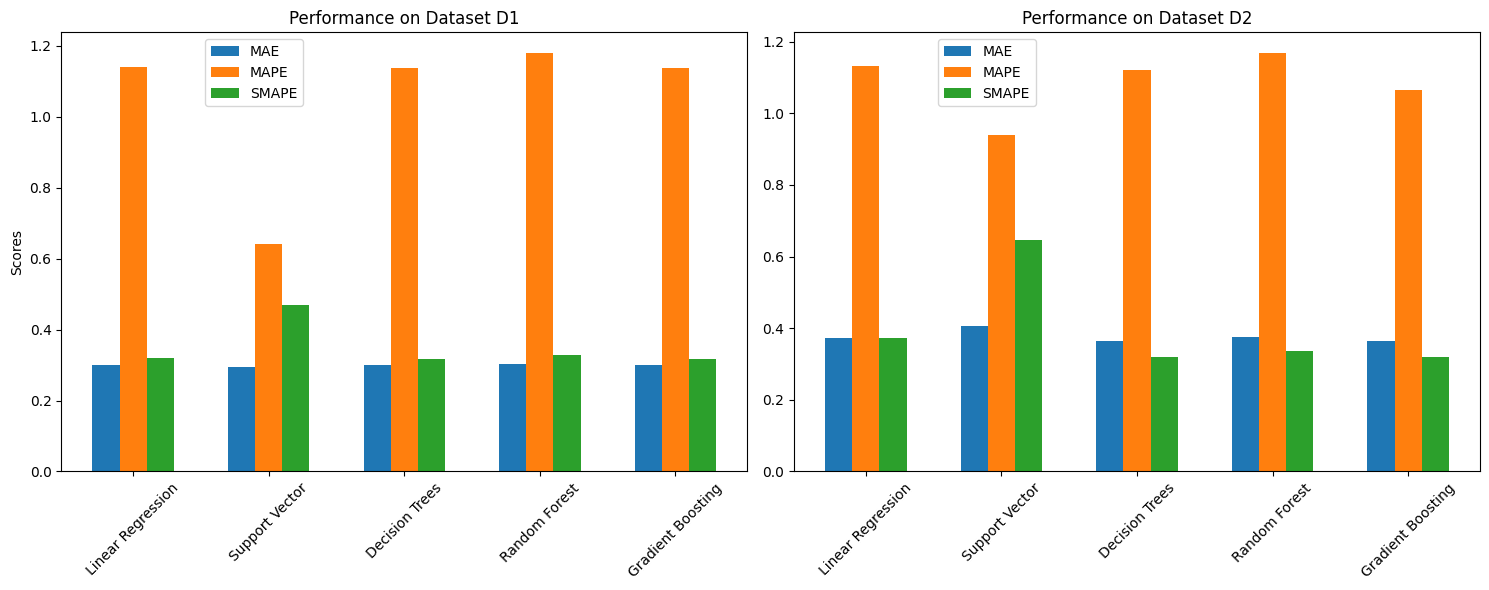

In [194]:
# Plot the results for D1 and D2 side by side
if extra_metrics:
    plot_bar_chart_model_extra(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')
else:
    plot_bar_chart_model(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')


#### <span style="color:#3182bd">Grouped Bar Chart by Error Metric</span>

In this plots we can see the error metrics for each model on both datasets.


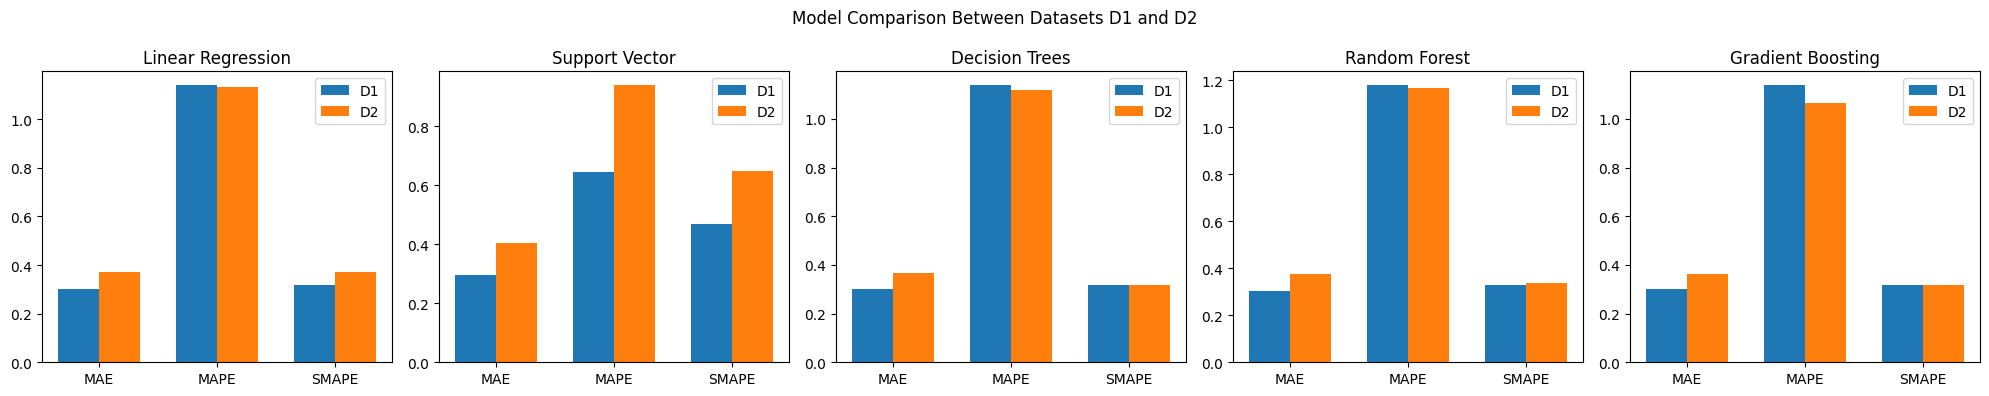

In [195]:
# Plot the model comparison between D1 and D2
if extra_metrics:
    plot_bar_chart_metric_extra(results_d1, results_d2, 'Model Comparison Between Datasets D1 and D2')
else:
    plot_bar_chart_metric(results_d1, results_d2, 'Model Comparison Between Datasets D1 and D2')


#### <span style="color:#3182bd">Line Chart</span>

We use line charts to compare the performance of the regression models across three metrics. Each line represents one of the metrics, and points on the lines correspond to the performance scores of the models.

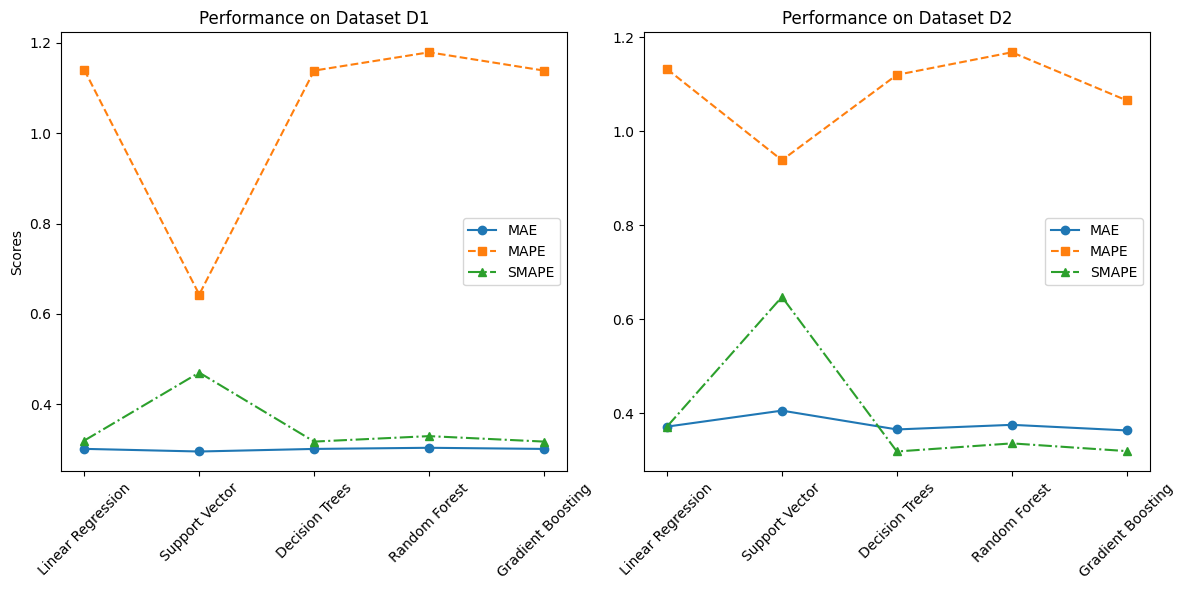

In [196]:
# Plot the results for D1 and D2 side by side
if extra_metrics:
    plot_line_chart_extra(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')
else:
    plot_line_chart(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')

## <span style="color:#e6550d">4. Conclusions</span>

**Comprehensive Analysis of Regression Model Performance**

**Data Understanding and Preprocessing**
- The dataset contains a 'target' variable of interest, with 'correl', 'cancor1', and 'fract2' having missing values.
- 'DS_Name' and 'Alg_Name' are categorical variables, and they were excluded from the analysis.

**Datasets Overview**
- **D1**: Missing values were handled by deletion. This may have reduced the dataset's size and potentially impacted representativeness and model performance.
- **D2**: Missing values were interpolated, aiming to preserve information but potentially introducing noise or bias into the dataset.

**Model Evaluation**
- Models were assessed using MAE, MAPE, and SMAPE, with visual comparisons illustrating their performance on D1 and D2.

**Metrics Interpretation**
- **MAE** shows average absolute errors; lower values are better.
- **MAPE** gives errors as a percentage, where lower is better.
- **SMAPE** accounts for symmetry in errors, with lower values indicating better predictions.

**Modeling Insights**
- **D1**: Clean dataset with missing values handled by deletion.
  - **Support Vector Machine** performs best in MAE and MAPE, suggesting accuracy with smaller datasets.
- **D2**: Larger dataset with interpolated missing values.
  - **Gradient Boosting** shows the best MAE, indicating effectiveness in managing absolute errors even with interpolated data.
  - **Decision Trees** perform well in terms of SMAPE, showcasing their strength in managing relative errors effectively.

**Overall Assessment**
- **Gradient Boosting** and **Random Forest** demonstrate resilience and robustness across both datasets.
- Data preprocessing, such as handling missing values through interpolation or deletion, significantly influences model performance.
- Feature engineering, hyperparameter tuning, and ensemble methods could further enhance model effectiveness.

**Recommendations for Practice**
- Select **Support Vector Machine** for smaller, cleaner datasets (D1) for its lower MAE and MAPE.
- Consider **Gradient Boosting** or **Decision Trees** for larger datasets with interpolated values (D2), focusing on the balance between MAE, MAPE, and SMAPE.
- Employ cross-validation and other validation techniques for a comprehensive model evaluation.

**Future Directions**
- Investigate the impact of different interpolation methods on D2's data quality.
- Explore additional validation methods for a thorough assessment of model stability and generalizability.


## <span style="color:#e6550d">5. Optional Test with Normalization</span>


<span style="color:red">*This is just a test conducted to underline the fact that the standardization is the best technique to train our models on our dataset. It's not mandatory.*</span>

### <span style="color:#31a354">Normalizing the data</span>

In [197]:
if normalize_test:   
    D1_normalized, D2_normalized = normalize_datasets(D1, D2)

    # Set seed for reproducibility
    np.random.seed(42)

    # Use the normalized datasets to train and evaluate the models
    D1 = pd.DataFrame(D1_normalized, columns=D1.columns)
    D2 = pd.DataFrame(D2_normalized, columns=D2.columns)

    # Data preparation
    y_d1 = D1['target']
    X_d1 = D1.drop('target', axis=1)
    X_train_d1, X_test_d1, y_train_d1, y_test_d1 = train_test_split(X_d1, y_d1, test_size=0.2)

    y_d2 = D2['target']
    X_d2 = D2.drop('target', axis=1)
    X_train_d2, X_test_d2, y_train_d2, y_test_d2 = train_test_split(X_d2, y_d2, test_size=0.2)

    # Training and evaluation on D1 and D2 dataset
    results_d1 = train_and_evaluate(X_train_d1, X_test_d1, y_train_d1, y_test_d1)
    results_d2 = train_and_evaluate(X_train_d2, X_test_d2, y_train_d2, y_test_d2)

    # Convert the results to DataFrames to display in a tabular format
    results_df_d1 = pd.DataFrame(results_d1).T
    results_df_d2 = pd.DataFrame(results_d2).T

    print("Results on D1:")
    print(results_df_d1)

    print("\nResults on D2:")
    print(results_df_d2)
    
    
    # Plot the results for D1 and D2 side by side
    if extra_metrics:
        plot_bar_chart_model_extra(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')
    else:
        plot_bar_chart_model(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')
        

    # Plot the model comparison between D1 and D2
    if extra_metrics:
        plot_bar_chart_metric_extra(results_d1, results_d2, 'Model Comparison Between Datasets D1 and D2')
    else:
        plot_bar_chart_metric(results_d1, results_d2, 'Model Comparison Between Datasets D1 and D2')
        
        
    # Plot the results for D1 and D2 side by side
    if extra_metrics:
        plot_line_chart_extra(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')
    else:
        plot_line_chart(results_d1, results_d2, 'Performance on Dataset D1', 'Performance on Dataset D2')
